In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [25]:
Nx = 1000
x = np.linspace(-5,5,Nx)
psi = np.zeros_like(x)

In [26]:
def potencial (x):
    return ((x**2)/2)

In [27]:
def psi_():
    psi = np.zeros_like(x)  
    psi[0] = 0
    psi[1] = 1e-5
    return psi

In [36]:
psi = psi_()

In [37]:
def numerov (x,psi,E):
    R = 2*(potencial(x)- E)
    h = x[1]-x[0]
    for i in range(2,len(R)):
        k1 = 2*(1+((5*h**2)/12)*R[i-1])*psi[i-1]
        k2 = (1-((h**2)*R[i-2])/12)*psi[i-2]
        k3 = (1-((h**2)*R[i])/12)
        psi[i] = (k1-k2)/k3
    return psi

In [38]:
numerov(x,psi,1.5)[536]

-1.9545053995010264

In [54]:
dE = 0.001
E = np.array([1.,1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.0])
E_ = []
for i in E:
    psi1 = np.linspace(-5,5,Nx)
    E1 = numerov(x,psi1,i)[-1]
    psi2 = np.linspace(-5,5,Nx)
    E2 = numerov(x,psi2,i-dE) [-1]
    if E2*E1 < 0:
        E_.append(i)

E_

[1.5, 2.5, 3.5, 4.5, 5.5]

In [55]:
plt.plot(numerov(x,psi,1.5))

<IPython.core.display.Javascript object>


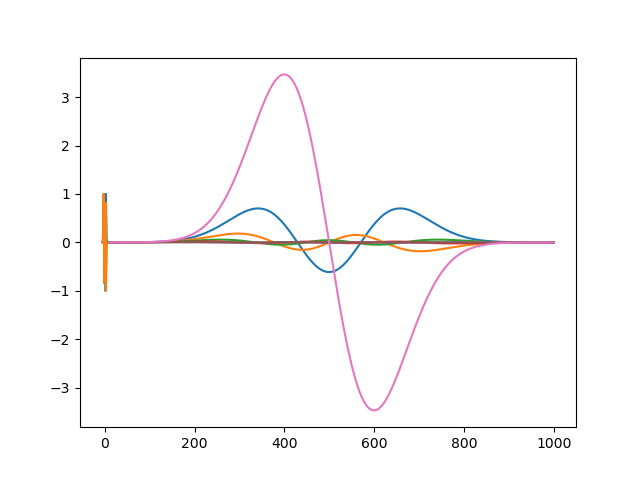

In [53]:
for i in E_:
    plt.plot(numerov(x,psi,i))

<IPython.core.display.Javascript object>


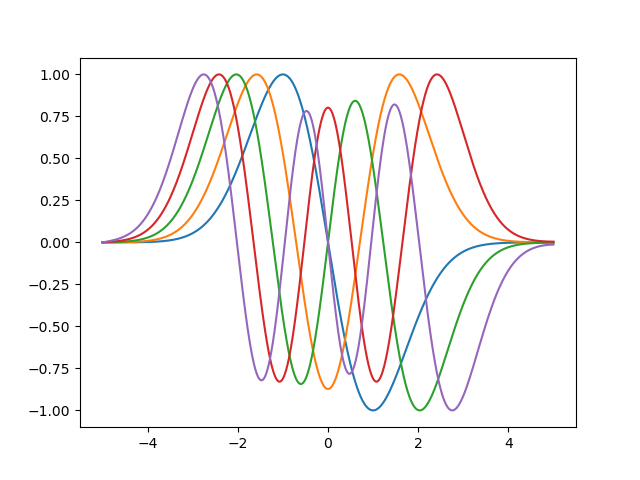

In [57]:
for i in E_:
    Eh = numerov(x,psi,i)
    Eh = Eh/np.max(Eh)
    plt.plot(x,Eh)

In [60]:
def potencial2 (x):
    return -10*np.exp((-x**2)/20)

In [61]:
def numerov2 (x,psi,E):
    R = 2*(potencial2(x)- E)
    h = x[1]-x[0]
    for i in range(2,len(R)):
        k1 = 2*(1+((5*h**2)/12)*R[i-1])*psi[i-1]
        k2 = (1-((h**2)*R[i-2])/12)*psi[i-2]
        k3 = (1-((h**2)*R[i])/12)
        psi[i] = (k1-k2)/k3
    return psi

In [64]:
dE = 0.001
E = np.linspace(0,10,10000)
E_0 = []
for i in E:
    psi1 = np.linspace(-5,5,Nx)
    E1 = numerov2(x,psi1,i)[-1]
    psi2 = np.linspace(-5,5,Nx)
    E2 = numerov2(x,psi2,i-dE) [-1]
    if E2*E1 < 0:
        E_.append(i)

E_0

[]

In [65]:
for i in E_0:
    Eh2 = numerov2(x,psi,i)
    Eh2 = Eh2/np.max(Eh2)
    plt.plot(x,Eh)